In [1]:
from __future__ import division
import numpy as np
import scipy.stats as ss
import cv2
import matplotlib.pyplot as plt
import class_faceRecog as Ctest

2 PCA and Eigenfaces [9 Points]

Load the dataset of faces from:

In [2]:
Train_Dir = "E:\\Users\\Saman\\PycharmProjects\\PCA-Eigenfaces\\image_face_1"

In [3]:
eigen_face_train = Ctest.FaceRecognition(Train_Dir)

loaded all images: 34, subject number is: 1
Get the n_components to preserve variance: var=0.80, K=15


In [4]:
test_data = eigen_face_train.store_testing()

 Compute and display the mean face.

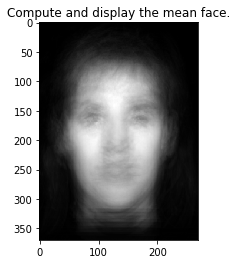

In [5]:
eigen_face_train.visualize_mean_vector()
plt.show()

How many principal components do you need to capture 80% of face variance?

In [6]:
eigen_face_train.K = eigen_face_train.get_n_components_2_variance(0.80)
print ("The number of principal components to capture 80 percent of face variance: %d" % (eigen_face_train.K))

The number of principal components to capture 80 percent of face variance: 15


Visualize the first k = 16 eigenfaces in a 4 * 4 grid.

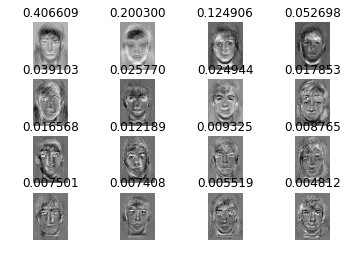

In [7]:
eigen_face_train.visualize_eigen_vector(16)
plt.show()

Reconstruct each subject's face as a linear combination of the first
k = {1; 10; 20; 34} eigenfaces. Visualize the results.

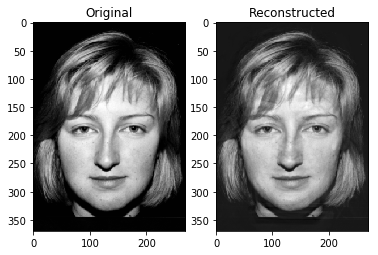

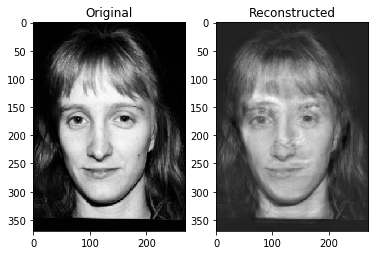

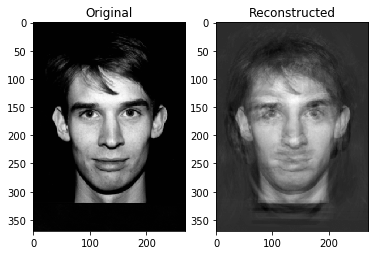

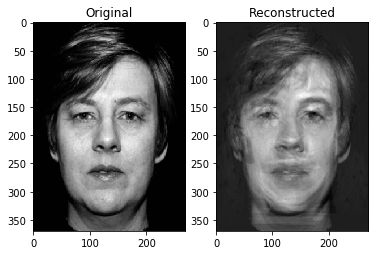

In [8]:
for i,var in enumerate([1, 10, 20, 34]):
    eigen_face_train.reconstruct_eigenFaces(eigen_face_train.vector_matrix[:,var-1])
plt.show()

3 Face Recognition with Eigenfaces [6 Points]

For this part of the exercise a dierent face image should be loaded for each subject
than the one used for computing the eigenfaces in Section 2.

Repeat the reconstruction task (Section 2.4) with the newly loaded
subject face. Note that the eigenfaces are not being recomputed here.

In [9]:
Test_Dir = "E:\\Users\\Saman\\PycharmProjects\\PCA-Eigenfaces\\image_face_2"

In [10]:
eigen_face_test = Ctest.FaceRecognition(Test_Dir, test_data)

loaded all images: 34, subject number is: 1
Get the n_components to preserve variance: var=0.80, K=17


Perform face recognition for a new face using eigenfaces as features
learned

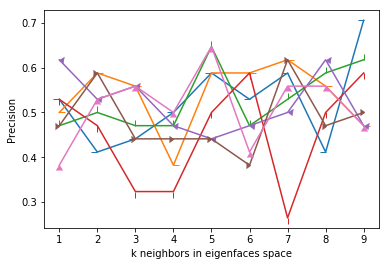

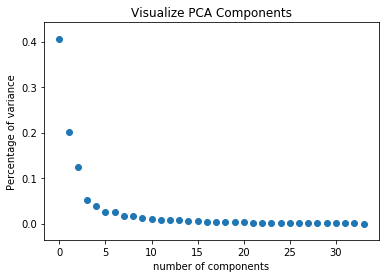

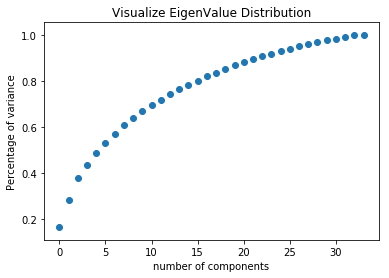

In [11]:
plt.figure()
plt.xlabel('k neighbors in eigenfaces space')
plt.ylabel('Precision')
precisions = []
for i,var in enumerate([0.99,0.95,0.90,0.80,0.70,0.60,0.50]):
    precisions.append([])
    for j,knn_k in enumerate(range(1,10)):
        eigen_face_test.K = eigen_face_test.get_n_components_2_variance(var)
        pre = eigen_face_test.get_eval(knn_k)
        precisions[i].append(pre)
        #print("knn_k: %2d, variance:%.2f(%d),\tprecision: %.4f" % (knn_k, var, eigen_face_test.K, pre))
    plt.plot(range(1,10),precisions[i],label="variance: %.0f%%" % (var*100),marker=i)
    
eigen_face_train.visualize_pca_components_proportions()
eigen_face_train.visualize_eigen_value_distribution()  
plt.legend()
plt.show()